# Adeline and Madeline

In this notebook, we will train a model based on madeline and adeline to classify the wines in the wine dataset. 

## Introduction

The Adeline neuron typically uses bipolar (1 or -1) activations for its input signals and its target output (although it is not restricted to such values). The weights on the connections from the input units to the Adeline neuron are adjustable. The Adeline neuron also has a bias, which acts like an adjustable weight on a connection from a unit whose activation is always 1. In general, Adeline can be trained by delta rule, also known as the Least Mean Squares (LMS) algorithm. The LMS algorithm is a simple and effective method for training Adeline. Madeline is a multi-layered Adeline.

The formula for the Adeline neuron is:

$$ y = f(\sum_{i=1}^{n} w_i x_i + b) $$

\begin{equation}
f(x) = \begin{cases} 1 & \text{if } x \geq 0 \\ -1 & \text{if } x < 0 \end{cases}
\end{equation}


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine, make_gaussian_quantiles
from tabulate import tabulate
from tqdm.notebook import tqdm
from IPython.display import display, HTML

## Dataset 

We will use the wine dataset from sklearn. The dataset is a multi-class classification dataset. The dataset has 13 features and 3 classes. Class 0, 1, and 2, which represent the type of wine, and are in the target column.

In [13]:
wines = load_wine()
print(wines.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [18]:
wines_df = pd.DataFrame(wines.data, columns=wines.feature_names)

display(wines_df.head())

print(wines.target_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


['class_0' 'class_1' 'class_2']


In [24]:
scaled_data = StandardScaler().fit_transform(wines.data)
wines_df_scaled = pd.DataFrame(scaled_data, columns=wines.feature_names)
wines_df_scaled["target"] = wines.target
display(wines_df_scaled.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


Next we try to plot the distribution of the target column, based on `alcohol` and `malic_acid` features.

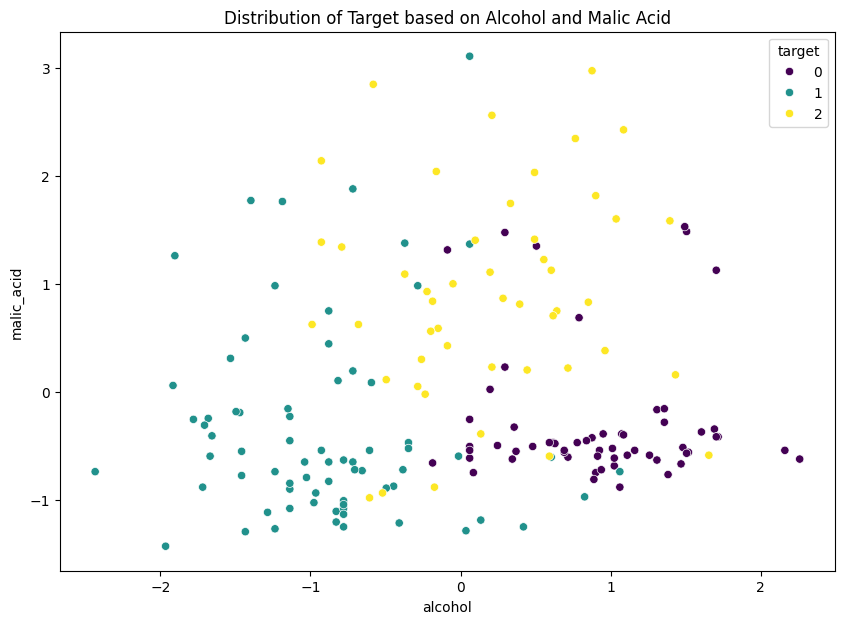

In [36]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=wines_df_scaled, x="alcohol", y="malic_acid", hue="target", palette="viridis")
plt.title('Distribution of Target based on Alcohol and Malic Acid')
plt.show()

Since we want to first classify the wines based on the `alcohol` and `malic_acid` features, that whether it is class 0 or not, we will only consider the wines with `class 0` and `not class 0`.

In [41]:
wines_df_scaled["class_0 classification"] = wines_df_scaled.apply(lambda x: 1 if x["target"] == 0 else -1, axis=1)

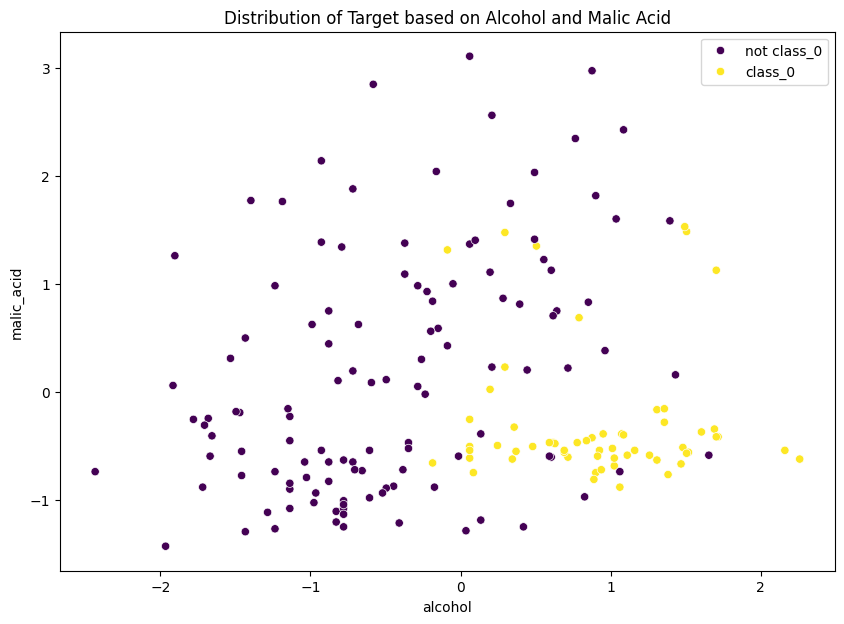

In [43]:
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    data=wines_df_scaled,
    x="alcohol",
    y="malic_acid",
    hue="class_0 classification",
    palette="viridis",
)
plt.title("Distribution of Target based on Alcohol and Malic Acid")
legend_labels, _ = scatter.get_legend_handles_labels()
scatter.legend(legend_labels, ["not class_0", "class_0"])
plt.show()

Now we will train a model based on Adeline to classify the wines based on the `alcohol` and `malic_acid` features.

In [99]:
class Adaline:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        
    def compile(self):
        pass

    def fit(self, x, y):
        self.weights = np.zeros(1 + x.shape[1]) + 0.01
        self.cost = []

        for _ in tqdm(range(self.n_iters)):
            output = self.net_input(x)
            errors = y - output
            self.weights[1:] += self.learning_rate * x.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost.append(cost)
        return self

    def net_input(self, x):
        return np.dot(x, self.weights[1:]) + self.weights[0]

    def predict(self, x):
        self.predictions = np.where(self.net_input(x) >= 0.0, 1, -1)
        return self.predictions

    def accuracy_score(self, x, y):
        return accuracy_score(y, self.predict(x))

In [108]:
def plot_decision_regions(x, y, classifier, resolution=0.02):
    plt.figure(figsize=(10, 7))

    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = matplotlib.colors.ListedColormap(colors[: len(np.unique(y))])

    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=x[y == cl, 0],
            y=x[y == cl, 1],
            alpha=0.8,
            c=[cmap(idx)],
            marker=markers[idx],
            label=cl,
        )
        
    plt.xlabel("alcohol")
    plt.ylabel("malic_acid")
    plt.legend(loc="upper left")
    plt.show()

In [ ]:
def plot_errors(model):
    plt.figure(figsize=(10, 7))
    plt.plot(range(1, len(model.cost) + 1), model.cost, marker="o")
    plt.xlabel("Epochs")
    plt.ylabel("Sum-squared-error")
    plt.title("Adaline - Learning rate 0.0001")
    plt.show()

In [101]:
model = Adaline(learning_rate=0.0001, n_iters=1000)

In [ ]:
x = wines_df_scaled[["alcohol", "malic_acid"]].values
y_class_0 = wines_df_scaled["class_0 classification"].values

In [ ]:
x_train_class_0, x_test_class_0, y_train_class_0, y_test_class_0 = train_test_split(x, y_class_0, test_size=0.2, random_state=42)

In [102]:
model.compile()
model.fit(x_train_class_0, y_train_class_0)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [110]:
y_train_pred = model.predict(x_train_class_0)
y_test_pred = model.predict(x_test_class_0)

In [111]:
train_accuracy = model.accuracy_score(x_train_class_0, y_train_class_0)
test_accuracy = model.accuracy_score(x_test_class_0, y_test_class_0)

In [112]:
table = [["Train", train_accuracy], ["Test", test_accuracy]]
print(tabulate(table, headers=["Dataset", "Accuracy"], tablefmt="pretty"))

+---------+--------------------+
| Dataset |      Accuracy      |
+---------+--------------------+
|  Train  | 0.852112676056338  |
|  Test   | 0.8888888888888888 |
+---------+--------------------+


Then we plot the error change with the number of epochs, and the decision boundary.

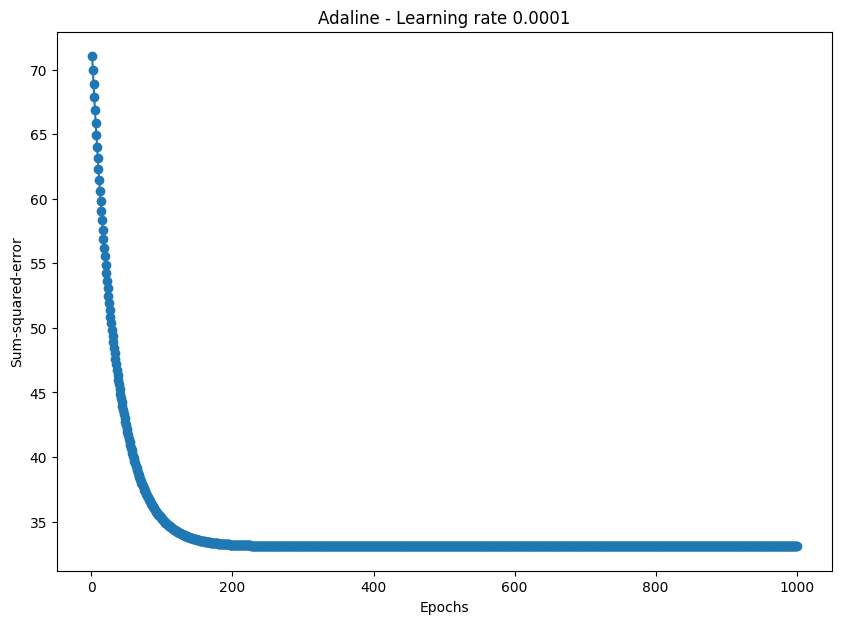

In [116]:
plot_errors(model)

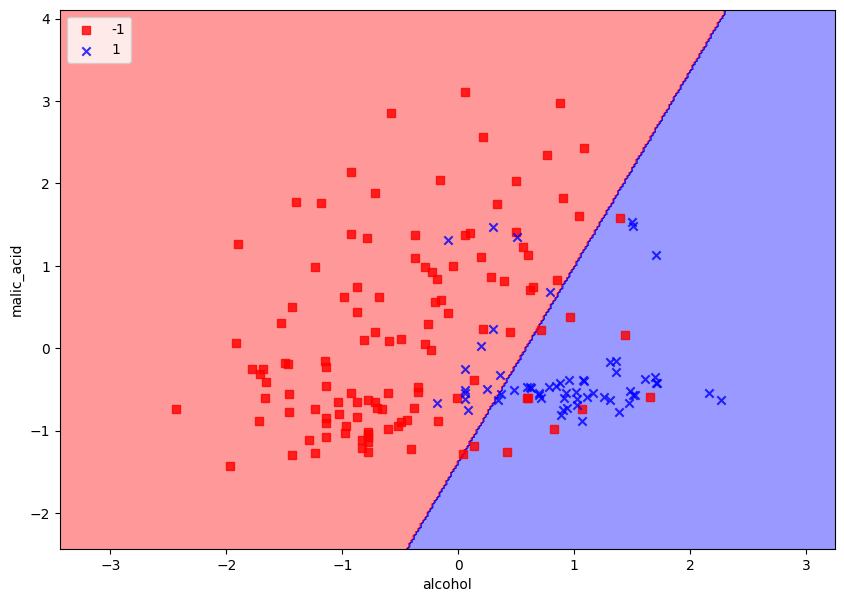

In [113]:
plot_decision_regions(x, y_class_0, classifier=model)

Now we repeat the whole process for `class 1` and `not class 1`.

In [118]:
wines_df_scaled["class_1 classification"] = wines_df_scaled.apply(lambda x: 1 if x["target"] == 1 else -1, axis=1)

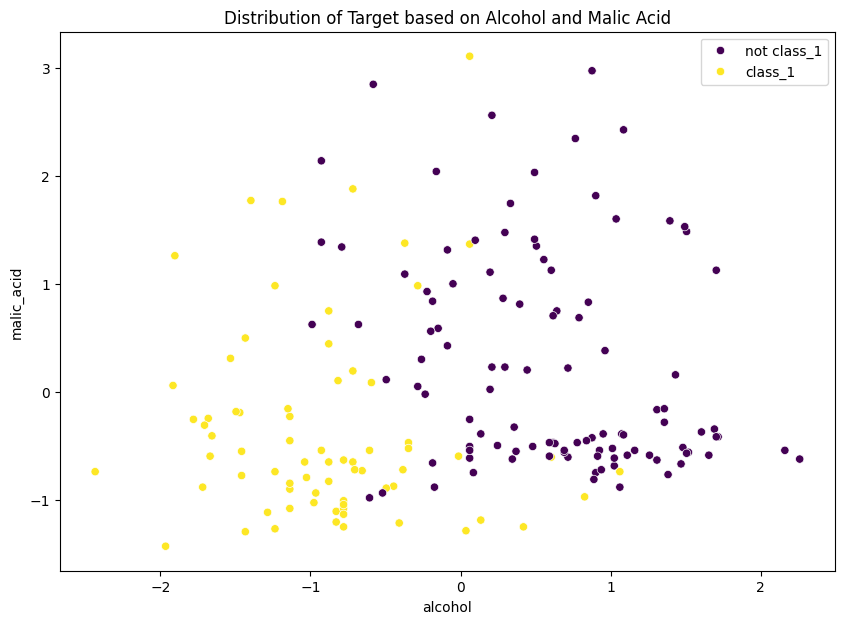

In [119]:
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    data=wines_df_scaled,
    x="alcohol",
    y="malic_acid",
    hue="class_1 classification",
    palette="viridis",
)
plt.title("Distribution of Target based on Alcohol and Malic Acid")
legend_labels, _ = scatter.get_legend_handles_labels()
scatter.legend(legend_labels, ["not class_1", "class_1"])
plt.show()

In [120]:
y_class_1 = wines_df_scaled["class_1 classification"].values

In [121]:
x_train_class_1, x_test_class_1, y_train_class_1, y_test_class_1 = train_test_split(x, y_class_1, test_size=0.2, random_state=42)

In [122]:
model = Adaline(learning_rate=0.0001, n_iters=1000)

In [123]:
model.compile()
model.fit(x_train_class_1, y_train_class_1)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [124]:
y_train_pred = model.predict(x_train_class_1)
y_test_pred = model.predict(x_test_class_1)

In [125]:
train_accuracy = model.accuracy_score(x_train_class_1, y_train_class_1)
test_accuracy = model.accuracy_score(x_test_class_1, y_test_class_1)

In [126]:
table = [["Train", train_accuracy], ["Test", test_accuracy]]
print(tabulate(table, headers=["Dataset", "Accuracy"], tablefmt="pretty"))

+---------+--------------------+
| Dataset |      Accuracy      |
+---------+--------------------+
|  Train  | 0.8732394366197183 |
|  Test   | 0.9444444444444444 |
+---------+--------------------+


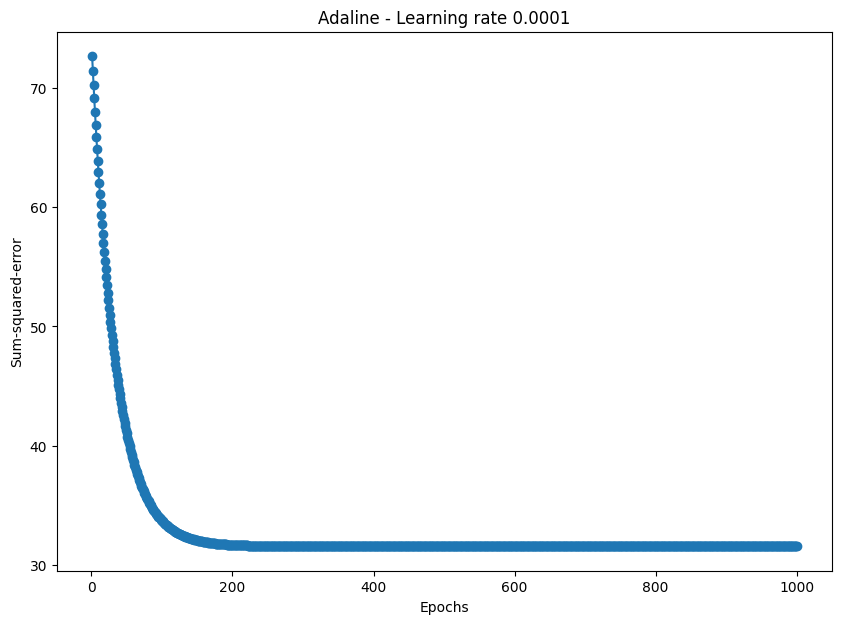

In [127]:
plot_errors(model)

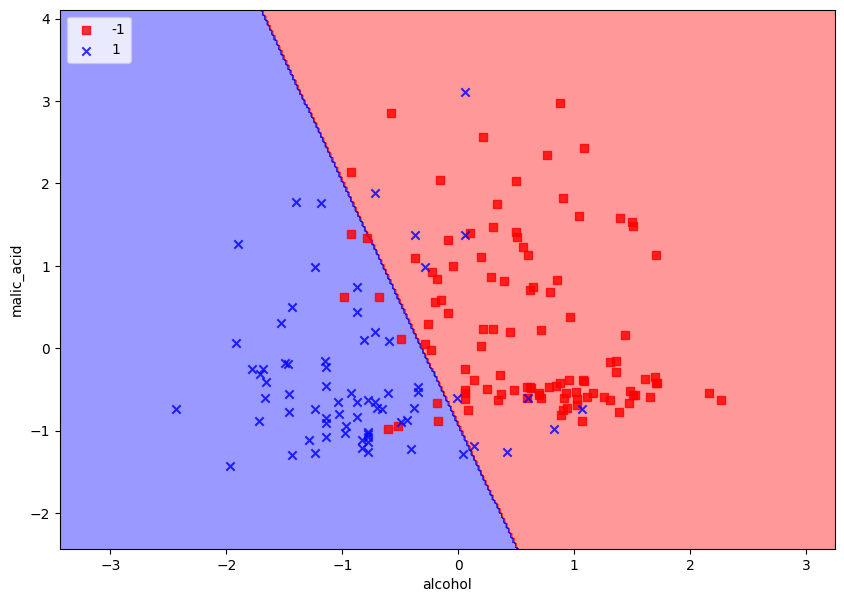

In [128]:
plot_decision_regions(x, y_class_1, classifier=model)

When we classify for `class 1` and `not class 1`, the results are better than the previous classification, the error is less and the decision boundary is more accurate. This is because the wines in `class 1` are more separable than the wines in `class 0`, and the separation is more clear.

## Madeline

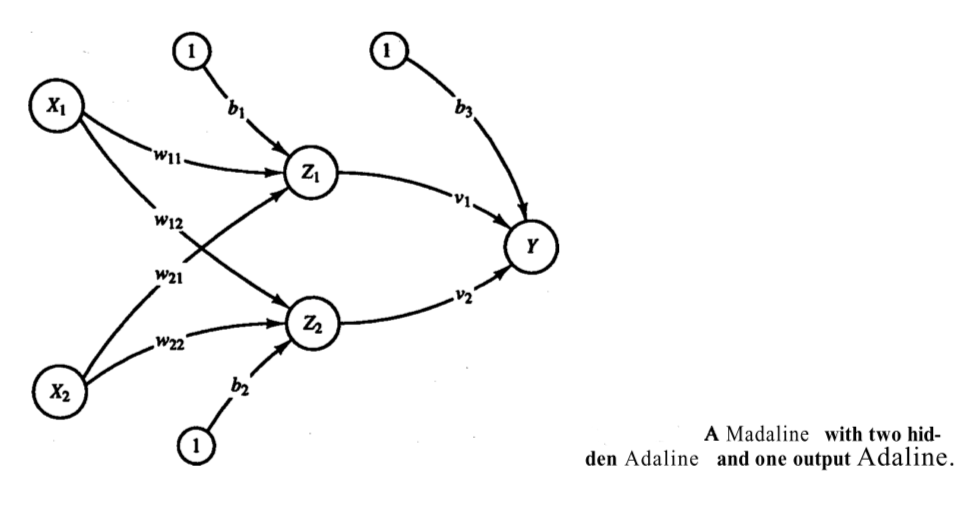

For updating the weights in the Madeline, there are two algorithms that are commonly used: 

1. MR-I algorithm (the original form of MADALINE training): only the weights for the hidden Adalines are adjusted; the weights for the output unit are fixed.
2. MR-II algorithm: both the weights for the hidden Adalines and the weights for the output unit are adjusted.

We will try to use this model to classify the `make_gaussian_quantiles` dataset from sklearn. For training the model, we will use both the MR-I and MR-II algorithms. At first we try this model with 3 neurons in the hidden layer, and then we try with 5 and then 8 neurons in the hidden layer.

In [ ]:
# Madeline

In [ ]:
np.random.seed(42)
x, y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=300, random_state=42)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    x=x[:, 0],
    y=x[:, 1],
    hue=y,
    palette="viridis",
)
plt.title("Non-linearly Separable Data (make_gaussian_quantiles)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()